In [431]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from pandas_profiling import profile_report

SEED =100
np.random.seed(SEED)

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [156]:
train.drop_duplicates(subset="Game_ID", inplace=True)
test.drop_duplicates(subset="Game_ID", inplace=True)

KeyError: Index(['Game_ID'], dtype='object')

In [432]:
%matplotlib inline

In [433]:
# Reading the data
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
game_statistics = pd.read_csv("game_statistics.csv")

/home/sadkh/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [434]:
train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [435]:
test.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team
0,2018-12-08,3,102.0,ID_8518U587,Antennae,Cosmos Redshift 7
1,2018-09-11,3,18.0,ID_H49BIKG7,Cosmos Redshift 7,Tadpole
2,2018-09-25,3,32.0,ID_PO6SP4VA,Cosmos Redshift 7,Medusa Merger
3,2018-10-02,3,40.0,ID_MZRCNBAQ,Cartwheel,Cosmos Redshift 7
4,2018-12-20,3,123.0,ID_CV9VOLIU,Cosmos Redshift 7,Needle


In [436]:
game_statistics.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [437]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       412 non-null    object 
 1   Season     412 non-null    int64  
 2   Match_ID   412 non-null    float64
 3   Game_ID    412 non-null    object 
 4   Home Team  412 non-null    object 
 5   Away Team  412 non-null    object 
 6   Score      412 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.7+ KB


In [438]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       234 non-null    object 
 1   Season     234 non-null    int64  
 2   Match_ID   234 non-null    float64
 3   Game_ID    234 non-null    object 
 4   Home Team  234 non-null    object 
 5   Away Team  234 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 11.1+ KB


In [439]:
game_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428101 entries, 0 to 2428100
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Game_ID            object 
 1   Player_ID          object 
 2   id                 float64
 3   X                  float64
 4   Y                  float64
 5   Team               object 
 6   Action             object 
 7   Half               object 
 8   Manager            object 
 9   Opposition_Team    object 
 10  Shots              float64
 11  SoT                float64
 12  Goals_scored       float64
 13  Goals_conceded     float64
 14  Accurate passes    float64
 15  Inaccurate passes  float64
 16  Passes             float64
 17  Start_minutes      float64
 18  End_minutes        float64
 19  next_player        object 
 20  next_action        object 
 21  next_x             float64
 22  next_y             float64
 23  event_id           float64
 24  next_team          object 
 25  next_event_id     

## Data Analyis & Visualization

In [440]:
# train.profile_report()

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

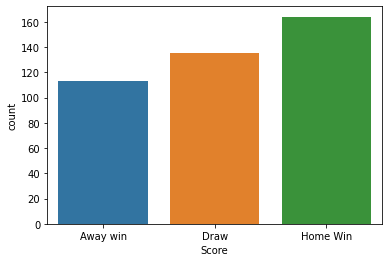

In [441]:
sns.countplot(train['Score'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Team', ylabel='count'>

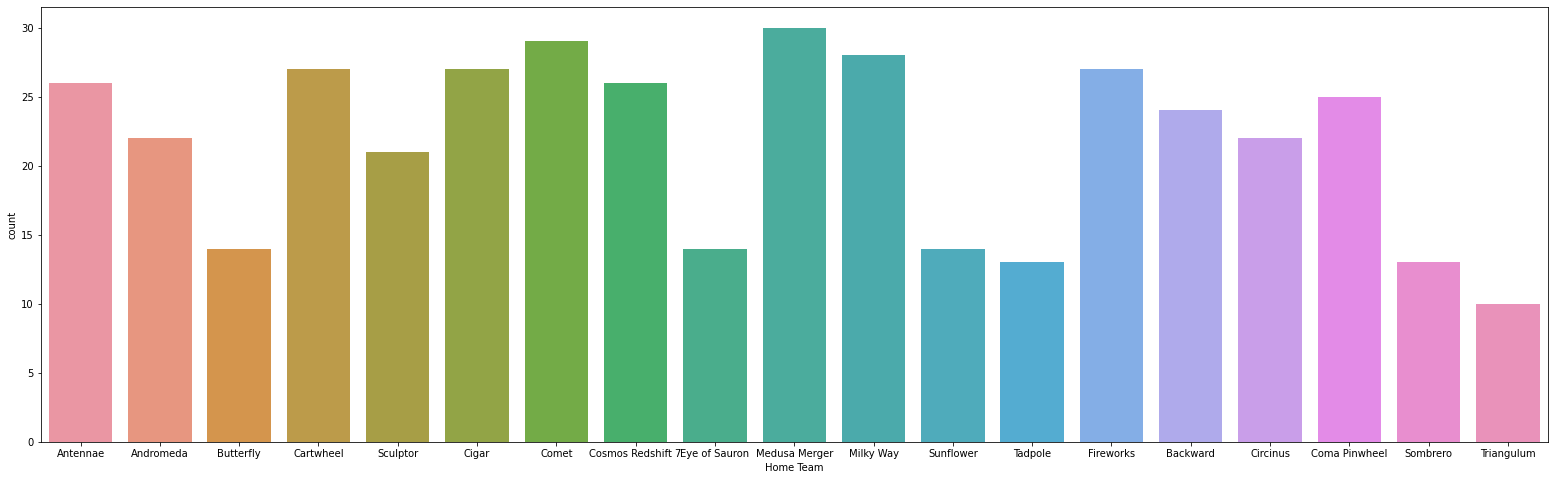

In [442]:
plt.figure(figsize=(27, 8))
sns.countplot(train['Home Team'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Away Team', ylabel='count'>

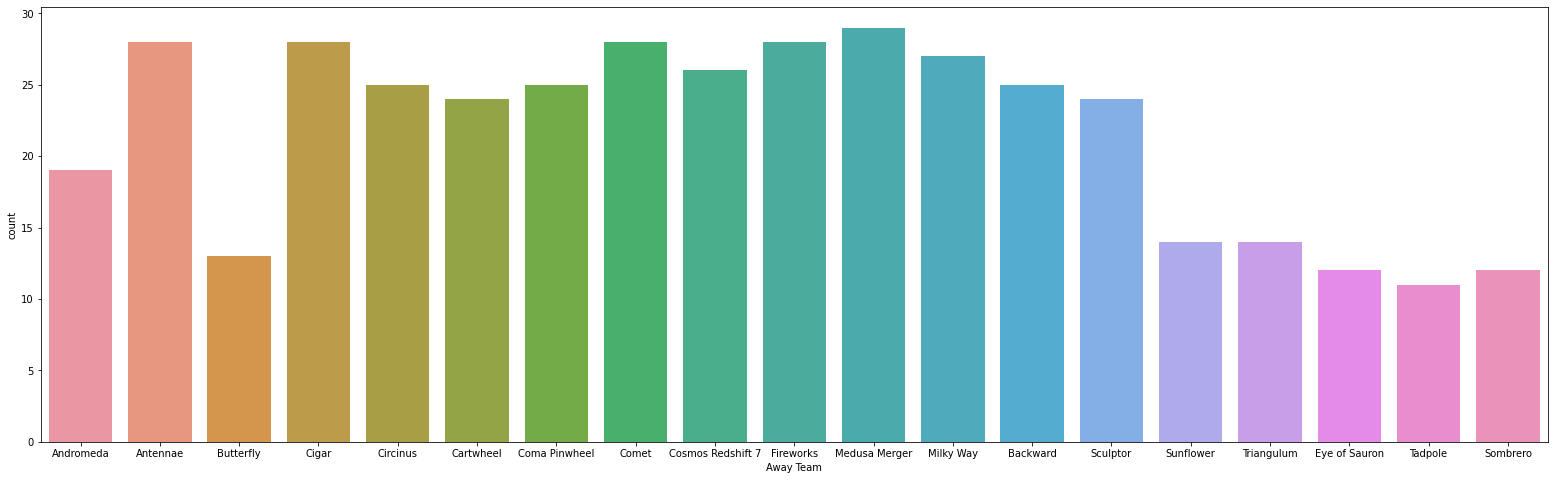

In [443]:
plt.figure(figsize=(27, 8))
sns.countplot(train['Away Team'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

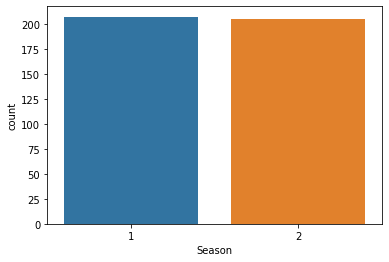

In [444]:
sns.countplot(train['Season'])

In [445]:
train['Home Team'].nunique()

19

In [446]:
train["Away Team"].nunique()

19

In [447]:
train["Match_ID"].nunique()

224

In [448]:
train["Game_ID"].nunique()

412

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Home Team', ylabel='count'>

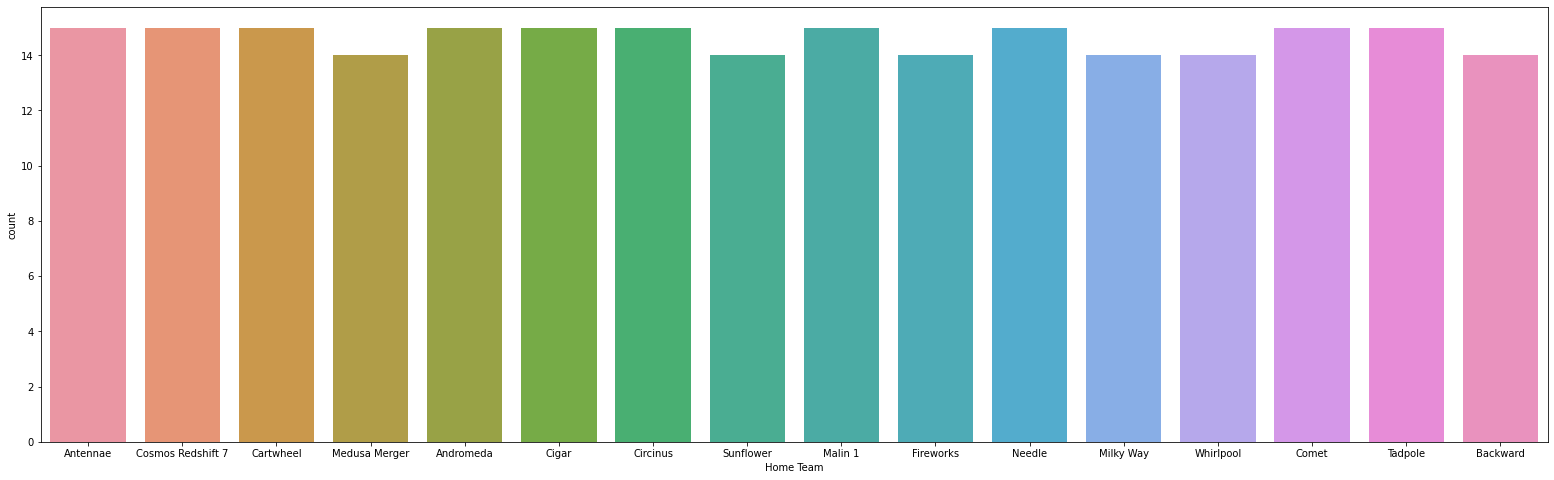

In [449]:
plt.figure(figsize=(27, 8))
sns.countplot(test['Home Team'])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Away Team', ylabel='count'>

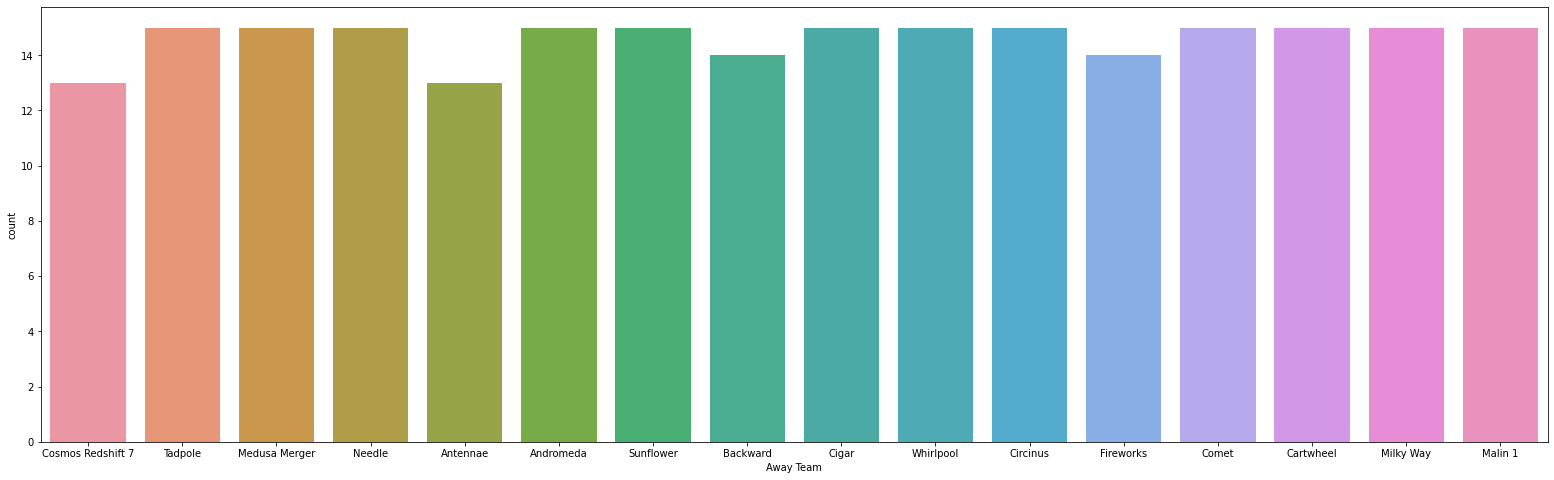

In [450]:
plt.figure(figsize=(27,8))
sns.countplot(test["Away Team"])

/home/sadkh/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='count'>

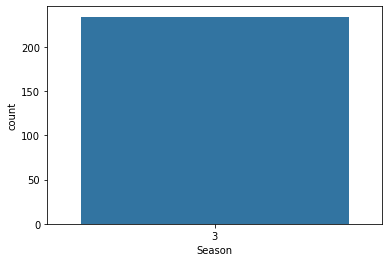

In [451]:
sns.countplot(test['Season'])

In [452]:
test["Home Team"].nunique()

16

In [453]:
test["Away Team"].nunique()

16

In [454]:
test["Match_ID"].nunique()

213

In [455]:
test["Game_ID"].nunique()

234

In [456]:
train.columns

Index(['Date', 'Season', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team',
       'Score'],
      dtype='object')

In [457]:
test.columns

Index(['Date', 'Season', 'Match_ID', 'Game_ID', 'Home Team', 'Away Team'], dtype='object')

## Data Preprocesing

In [458]:
train["Train"] = 1
test["Train"] = 0

train_test = pd.concat([train, test])

In [459]:
train_test.tail(5)

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score,Train
229,2018-12-08,3,300.0,ID_QKQ00O16,Malin 1,Needle,NaN,0
230,2018-12-11,3,300.0,ID_172V2IXW,Tadpole,Needle,NaN,0
231,2018-12-22,3,300.0,ID_2ZK5TE39,Circinus,Malin 1,NaN,0
232,2019-05-07,3,300.0,ID_IS54QGW9,Needle,Andromeda,NaN,0
233,2019-05-14,3,300.0,ID_YG9IONLS,Tadpole,Circinus,NaN,0


In [460]:
len(train_test)

646

In [461]:
game_statistics.head(5)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,Start_minutes,End_minutes,next_player,next_action,next_x,next_y,event_id,next_team,next_event_id,xt_value
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.03,0.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.05,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,...,0.07,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [462]:
# Merging all the data 
all_data = pd.merge(game_statistics, train_test, on="Game_ID")

In [463]:
all_data.shape

(2428101, 34)

In [464]:
all_data.sample(5)

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,next_team,next_event_id,xt_value,Date,Season,Match_ID,Home Team,Away Team,Score,Train
1785278,ID_A0EALXUP,Player_3JRB0GFG,1753.0,62.3,55.2,Medusa Merger,Inaccurate passes,2nd half,Akuma/Inuyasha,Sunflower,...,Sunflower,1037.0,0.0,2018-09-19,3,25.0,Medusa Merger,Sunflower,NaN,0
747486,ID_PMX7KBOK,Player_M6RKVH8G,2495.0,43.4,7.6,Medusa Merger,Positional attacks,2nd half,Levi,Cigar,...,NaN,NaN,NaN,2016-10-27,1,152.0,Medusa Merger,Cigar,Away win,1
1176713,ID_JMKNLEUZ,Player_LY73FGIV,2885.0,1.1,60.6,Cosmos Redshift 7,Challenges won,2nd half,Kouki,Cartwheel,...,NaN,NaN,NaN,2016-09-28,1,117.0,Cosmos Redshift 7,Cartwheel,Draw,1
1731272,ID_AOLHJTW3,Player_93SHHX3N,3075.0,95.3,14.1,Tadpole,Throw-in attacks,2nd half,Daiki,Fireworks,...,Tadpole,1758.0,0.0,2019-02-16,3,135.0,Fireworks,Tadpole,NaN,0
2285372,ID_1Y735BT9,Player_UMEMIWZL,2321.0,78.5,5.4,Andromeda,Positional attacks,2nd half,Ryoichi,Antennae,...,Andromeda,1337.0,0.0,2018-09-22,3,30.0,Andromeda,Antennae,NaN,0


In [465]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2428101 entries, 0 to 2428100
Data columns (total 34 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Game_ID            object 
 1   Player_ID          object 
 2   id                 float64
 3   X                  float64
 4   Y                  float64
 5   Team               object 
 6   Action             object 
 7   Half               object 
 8   Manager            object 
 9   Opposition_Team    object 
 10  Shots              float64
 11  SoT                float64
 12  Goals_scored       float64
 13  Goals_conceded     float64
 14  Accurate passes    float64
 15  Inaccurate passes  float64
 16  Passes             float64
 17  Start_minutes      float64
 18  End_minutes        float64
 19  next_player        object 
 20  next_action        object 
 21  next_x             float64
 22  next_y             float64
 23  event_id           float64
 24  next_team          object 
 25  next_event_id     

In [466]:
# msn.matrix(all_data)

In [467]:
all_data.isnull().sum() / len(all_data) 

Game_ID              0.000000
Player_ID            0.000000
id                   0.000000
X                    0.000000
Y                    0.000000
Team                 0.000000
Action               0.000004
Half                 0.000005
Manager              0.002307
Opposition_Team      0.000000
Shots                0.000038
SoT                  0.000038
Goals_scored         0.000038
Goals_conceded       0.000038
Accurate passes      0.000038
Inaccurate passes    0.000038
Passes               0.000038
Start_minutes        0.000004
End_minutes          0.000000
next_player          0.672909
next_action          0.672909
next_x               0.672909
next_y               0.672909
event_id             0.672820
next_team            0.672907
next_event_id        0.672909
xt_value             0.672820
Date                 0.000000
Season               0.000000
Match_ID             0.000000
Home Team            0.000000
Away Team            0.000000
Score                0.330340
Train     

In [468]:
train = all_data.loc[all_data["Train"] == 1].copy()
test = all_data.loc[all_data["Train"] == 0].copy()

In [469]:
train.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,next_team,next_event_id,xt_value,Date,Season,Match_ID,Home Team,Away Team,Score,Train
0,ID_ZZKYYPVY,Player_O7HO1NOB,1.0,52.5,34.0,Circinus,Accurate passes,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
1,ID_ZZKYYPVY,Player_O7HO1NOB,2.0,52.5,34.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
2,ID_ZZKYYPVY,Player_J0V7B0YE,3.0,37.0,32.7,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
3,ID_ZZKYYPVY,Player_J0V7B0YE,4.0,39.5,33.0,Circinus,Positional attacks,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1
4,ID_ZZKYYPVY,Player_J0V7B0YE,5.0,39.5,33.0,Circinus,Inaccurate passes,1st half,Ryoichi,Backward,...,NaN,NaN,NaN,2017-12-06,2,39.0,Backward,Circinus,Home Win,1


In [470]:
test.head()

,Game_ID,Player_ID,id,X,Y,Team,Action,Half,Manager,Opposition_Team,...,next_team,next_event_id,xt_value,Date,Season,Match_ID,Home Team,Away Team,Score,Train
19031,ID_ZUPS2JD2,Player_5CBBVY85,1.0,52.5,34.0,Milky Way,Accurate passes,1st half,Masashi,Sunflower,...,Milky Way,1.0,-0.002220,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19032,ID_ZUPS2JD2,Player_5CBBVY85,2.0,52.5,34.0,Milky Way,Positional attacks,1st half,Masashi,Sunflower,...,Milky Way,0.0,0.000000,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19033,ID_ZUPS2JD2,Player_INTSA2WQ,3.0,37.5,30.9,Milky Way,Positional attacks,1st half,Masashi,Sunflower,...,Milky Way,1.0,0.000000,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19034,ID_ZUPS2JD2,Player_INTSA2WQ,4.0,37.5,30.9,Milky Way,Accurate passes,1st half,Masashi,Sunflower,...,Sunflower,2.0,0.016906,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0
19035,ID_ZUPS2JD2,Player_1AJ0QRLU,5.0,26.0,10.8,Sunflower,Positional attacks,1st half,Frodo,Milky Way,...,Milky Way,3.0,0.000000,2019-03-19,3,158.0,Sunflower,Milky Way,NaN,0


### Handling missing value

In [471]:
## Droping columns having very large no of missing values
train.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team", "next_event_id", "xt_value", "Train"], axis=1, inplace=True)
test.drop(["next_player", "next_action", "next_x", "next_y", "event_id", "next_team", "next_event_id", "xt_value", "Train", "Score"], axis=1, inplace=True)

In [472]:
train.isnull().sum()

Game_ID              0
Player_ID            0
id                   0
X                    0
Y                    0
Team                 0
Action               0
Half                 0
Manager              0
Opposition_Team      0
Shots                0
SoT                  0
Goals_scored         0
Goals_conceded       0
Accurate passes      0
Inaccurate passes    0
Passes               0
Start_minutes        0
End_minutes          0
Date                 0
Season               0
Match_ID             0
Home Team            0
Away Team            0
Score                0
dtype: int64

In [473]:
test.isnull().sum()

Game_ID                 0
Player_ID               0
id                      0
X                       0
Y                       0
Team                    0
Action                 10
Half                   11
Manager              5602
Opposition_Team         0
Shots                  92
SoT                    92
Goals_scored           92
Goals_conceded         92
Accurate passes        92
Inaccurate passes      92
Passes                 92
Start_minutes          10
End_minutes             0
Date                    0
Season                  0
Match_ID                0
Home Team               0
Away Team               0
dtype: int64

In [474]:
test["Start_minutes"].median()

46.78

In [475]:
# Filling nan values in categorical with mode
test["Action"].fillna(test["Action"].mode()[0], inplace=True)
test["Half"].fillna(test["Half"].mode()[0], inplace=True)
test["Manager"].fillna(test["Manager"].mode()[0], inplace=True)

# Filling nan values with median
test["Shots"].fillna(test["Shots"].median(), inplace=True)
test["SoT"].fillna(test["SoT"].median(), inplace=True)
test["Goals_scored"].fillna(test["Goals_scored"].median(), inplace=True)
test["Goals_conceded"].fillna(test["Goals_conceded"].median(), inplace=True)
test["Accurate passes"].fillna(test["Accurate passes"].median(), inplace=True)
test["Inaccurate passes"].fillna(test["Inaccurate passes"].median(), inplace=True)
test["Passes"].fillna(test["Passes"].median(), inplace=True)
test["Start_minutes"].fillna(test["Start_minutes"].median(), inplace=True)

In [476]:
# Dropping columns having very few missing values
test.isnull().sum()

Game_ID              0
Player_ID            0
id                   0
X                    0
Y                    0
Team                 0
Action               0
Half                 0
Manager              0
Opposition_Team      0
Shots                0
SoT                  0
Goals_scored         0
Goals_conceded       0
Accurate passes      0
Inaccurate passes    0
Passes               0
Start_minutes        0
End_minutes          0
Date                 0
Season               0
Match_ID             0
Home Team            0
Away Team            0
dtype: int64

## Features Engineering

In [477]:
train.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Date', 'Season', 'Match_ID',
       'Home Team', 'Away Team', 'Score'],
      dtype='object')

In [478]:
test.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Date', 'Season', 'Match_ID',
       'Home Team', 'Away Team'],
      dtype='object')

In [479]:
# Converting Date column datatye to datetime 
train["Date"] = pd.to_datetime(train["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [480]:
# Extracting day, month and year from date column
train["Year"] = train["Date"].dt.year
train["Month"] = train["Date"].dt.month
train["Day"] = train["Date"].dt.day
train.drop("Date", axis=1, inplace=True)


test["Year"] = test["Date"].dt.year
test["Month"] = test["Date"].dt.month
test["Day"] = test["Date"].dt.day
test.drop("Date", axis=1, inplace=True)

In [481]:
# Creating new feature "Total_shots"
train["Total_Shots"] = train["Shots"] + train["SoT"]
test["Total_Shots"] = test["Shots"] + test["SoT"]

In [482]:
# # Creating new feature "Total_min_played"
train["Total_min_played"] = train["End_minutes"] - train["Start_minutes"]
test["Total_min_played"] = test["End_minutes"] - test["Start_minutes"]

In [483]:
# Creating new feature "Total_goals"
train["Total_goals"] = train["Goals_scored"] + train["Goals_conceded"]
test["Total_goals"] = test["Goals_scored"] + test["Goals_conceded"]

In [484]:
# Creating new feature distance covered by baal from X to Y
train["Dist_X_Y"] = np.abs(train["Y"] - train["X"])
test["Dist_X_Y"] = np.abs(test["Y"] - test["X"])

In [485]:
# Extracting which half played from th "Half" column
train["Half"] = train["Half"].str.extract(r'([12])').astype("int64")
test["Half"] = test["Half"].str.extract(r'([12])').astype("int64")

In [486]:
# train["Half"] = LabelEncoder().fit_transform(train["Half"])
# test["Half"] = LabelEncoder().fit_transform(test["Half"])

In [487]:
train.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Season', 'Match_ID', 'Home Team',
       'Away Team', 'Score', 'Year', 'Month', 'Day', 'Total_Shots',
       'Total_min_played', 'Total_goals', 'Dist_X_Y'],
      dtype='object')

In [488]:
test.columns

Index(['Game_ID', 'Player_ID', 'id', 'X', 'Y', 'Team', 'Action', 'Half',
       'Manager', 'Opposition_Team', 'Shots', 'SoT', 'Goals_scored',
       'Goals_conceded', 'Accurate passes', 'Inaccurate passes', 'Passes',
       'Start_minutes', 'End_minutes', 'Season', 'Match_ID', 'Home Team',
       'Away Team', 'Year', 'Month', 'Day', 'Total_Shots', 'Total_min_played',
       'Total_goals', 'Dist_X_Y'],
      dtype='object')

In [489]:
test.isnull().sum()

Game_ID              0
Player_ID            0
id                   0
X                    0
Y                    0
Team                 0
Action               0
Half                 0
Manager              0
Opposition_Team      0
Shots                0
SoT                  0
Goals_scored         0
Goals_conceded       0
Accurate passes      0
Inaccurate passes    0
Passes               0
Start_minutes        0
End_minutes          0
Season               0
Match_ID             0
Home Team            0
Away Team            0
Year                 0
Month                0
Day                  0
Total_Shots          0
Total_min_played     0
Total_goals          0
Dist_X_Y             0
dtype: int64

## Handling Categorical Features

In [490]:
# train["Train"] = 1
# test["Train"] = 0

In [491]:
# train.head()

In [492]:
# test.head()

In [493]:
# Combining both the data for encoding all the categorical features at once
# train_test = pd.concat([train, test]) 

In [494]:
# train_test.tail()

In [495]:
# train_test.columns

In [496]:
# Initializing encoders
oe = OrdinalEncoder()
le = LabelEncoder()

# train_test["Player_ID"] = le.fit_transform(train_test[["Player_ID"]])
# train_test["Team"] = le.fit_transform(train_test[["Team"]])
# train_test["Action"] = le.fit_transform(train_test[["Action"]])
# train_test["Manager"] = le.fit_transform(train_test[["Manager"]])
# train_test["Home Team"] = le.fit_transform(train_test[["Home Team"]])
# train_test["Away Team"] = le.fit_transform(train_test[["Away Team"]])
# train_test["Opposition_Team"] = le.fit_transform(train_test[["Opposition_Team"]])

In [497]:
# Encoding categorical variables
train["Player_ID"] = oe.fit_transform(train[["Player_ID"]])
train["Team"] = oe.fit_transform(train[["Team"]])
train["Action"] = oe.fit_transform(train[["Action"]])
train["Manager"] = oe.fit_transform(train[["Manager"]])
train["Home Team"] = oe.fit_transform(train[["Home Team"]])
train["Away Team"] = oe.fit_transform(train[["Away Team"]])
train["Opposition_Team"] = oe.fit_transform(train[["Opposition_Team"]])

test["Player_ID"] = oe.fit_transform(test[["Player_ID"]])
test["Team"] = oe.fit_transform(test[["Team"]])
test["Action"] = oe.fit_transform(test[["Action"]])
test["Manager"] = oe.fit_transform(test[["Manager"]])
test["Home Team"] = oe.fit_transform(test[["Home Team"]])
test["Away Team"] = oe.fit_transform(test[["Away Team"]])
test["Opposition_Team"] = oe.fit_transform(test[["Opposition_Team"]])

In [498]:
# train_test.info()

In [499]:
# Splitting training and testing set
# train = train_test[train_test["Train"] == 1].copy()
# test = train_test[train_test["Train"] == 0].copy()
# test.drop("Score", axis=1, inplace=True)

In [500]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626003 entries, 0 to 2428100
Data columns (total 31 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Game_ID            1626003 non-null  object 
 1   Player_ID          1626003 non-null  float64
 2   id                 1626003 non-null  float64
 3   X                  1626003 non-null  float64
 4   Y                  1626003 non-null  float64
 5   Team               1626003 non-null  float64
 6   Action             1626003 non-null  float64
 7   Half               1626003 non-null  int64  
 8   Manager            1626003 non-null  float64
 9   Opposition_Team    1626003 non-null  float64
 10  Shots              1626003 non-null  float64
 11  SoT                1626003 non-null  float64
 12  Goals_scored       1626003 non-null  float64
 13  Goals_conceded     1626003 non-null  float64
 14  Accurate passes    1626003 non-null  float64
 15  Inaccurate passes  1626003 non-n

In [501]:
train.shape

(1626003, 31)

In [502]:
test.shape

(802098, 30)

## Feature Slection

In [503]:
# Removing duplicates
train.drop_duplicates(subset="Game_ID", inplace=True)
test.drop_duplicates(subset="Game_ID", inplace=True)

In [504]:
# Initializing labelencoder
le = LabelEncoder()

# Splittind data into featureS and target
X = train.drop(["Score", "Game_ID"], axis=1)
y = le.fit_transform(train["Score"])

In [505]:
X.shape

(412, 29)

In [506]:
le.classes_

array(['Away win', 'Draw', 'Home Win'], dtype=object)

In [507]:
game_id = test["Game_ID"]
test.drop("Game_ID", axis=1, inplace=True)

# Training models

In [508]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.06, random_state=SEED)

In [509]:
# Scaling the dataa
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## SVM


In [511]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
preds = svc.predict(X_test_scaled)
score = accuracy_score(y_test, preds)
print(score)

0.4


In [512]:
preds_test = svc.predict(test.values)

map_preds = {0:"Away win",
            1:"Draw",
            2:"Home Win"}

score = np.array(list(map(lambda x: map_preds[x], preds_test.flatten())))
sub = pd.DataFrame({"Game_ID": game_id,
                   "Score": score})

sub.to_csv("rf2.csv", index=None)

In [513]:
# test_scaled = scaler.transform(test.values) 

In [514]:
X_train.shape

(387, 29)

In [412]:
X_test.shape

(25, 29)

## RandomForest Classifier

In [413]:
# Initializing the model
rf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=SEED)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=100)

In [414]:
preds = rf.predict(X_test_scaled)
accuracy_score(y_test, preds)

0.44

Text(0.5, 1.0, 'Random Forest Feature Importances')

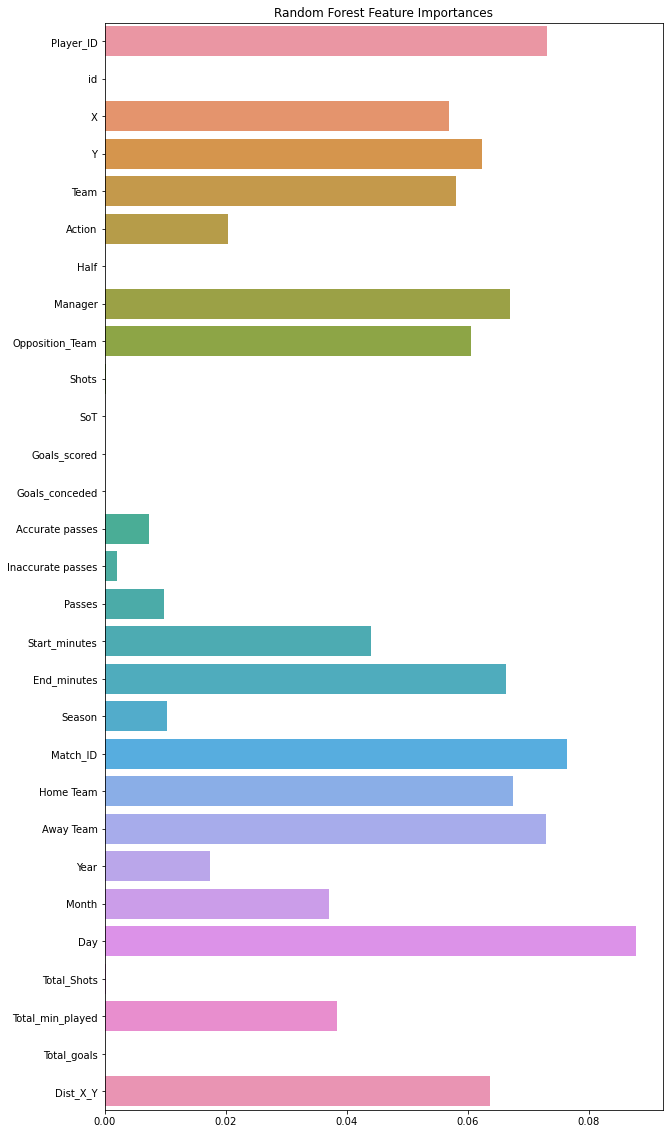

In [523]:
# Plotting features importances 
rf_feature_imp = rf.feature_importances_
columns = X.columns

plt.figure(figsize=(10, 20))
sns.barplot(x=rf_feature_imp, y=columns, orient="h")
plt.title("Random Forest Feature Importances")

In [522]:
# mapping values to the predictions of the model
map_preds = {0:"Away win",
            1:"Draw",
            2:"Home Win"}

score = np.array(list(map(lambda x: map_preds[x], preds_test)))
# print(score)

In [417]:
# Creating a submission dataframe
sub = pd.DataFrame({"Game_ID": game_id,
                   "Score": score})
# sub.head()
# saving the dataframe for submission
sub.to_csv("rf_sub_4.csv", index=None)

## XGBoost Classifier

In [521]:
# xgb = XGBClassifier(n_estimators=1000, max_depth=8, random_state=SEED)
# xgb.fit(X_train, y_train)

In [520]:
# preds = xgb.predict(X_test)
# accuracy_score(y_test, preds)

In [420]:
# test_scaled = scaler.transform(test.drop("Game_ID", axis=1).values)
# preds_test = xgb.predict(test_scaled)

# preds_test

In [421]:
# map_preds = {0:"Away win",
#             1:"Draw",
#             2:"Home Win"}

# score = np.array(list(map(lambda x: map_preds[x], preds_test)))
# print(score)

In [422]:
# sub = pd.DataFrame({"Game_ID": game_id,
#                    "Score": score})
# sub.head()

In [423]:
# sub.to_csv("xgb_2.csv", index=None)

## CatBoostClassifier

In [515]:
# cb = CatBoostClassifier()
# cb.fit(X_train, y_train)

In [425]:
# preds = cb.predict(X_test)
# print(f"accuracy_score: {accuracy_score(y_test, preds)}")

accuracy_score: 0.32


In [426]:
# preds_test = cb.predict(test.values)

# map_preds = {0:"Away win",
#             1:"Draw",
#             2:"Home Win"}

# score = np.array(list(map(lambda x: map_preds[x], preds_test.flatten())))
# sub = pd.DataFrame({"Game_ID": game_id,
#                    "Score": score})

In [517]:
# sub.shape

In [428]:
# sub.to_csv("cb_13.csv", index=None)

In [518]:
# cb.feature_importances_

In [516]:
# plt.figure(figsize=(20, 10))
# sns.barplot(cb.feature_importances_, X.columns)